Filtrage Kalman 

In [1]:
#Q2
import numpy as np 
T_e= 1
T = 100
sigma_Q =1
sigma_px = 30
sigma_py = 30
F=np.eye(4,4)+np.array([[0,T_e,0,0],[0,0,0,0],[0,0,0,T_e],[0,0,0,0]])
H = np.zeros((2,4)) + np.array([[1,0,0,0],[0,0,1,0]])
R = np.zeros((2,2)) + np.array([[sigma_px**2,0],[0,sigma_py**2]])
def construct_Q(T_e) : 
    Q=np.zeros((4,4))
    Q[0][0] = (T_e**3)*(1/3)
    Q[2][2] = (T_e**3)*(1/3)
    Q[1][1] = T_e
    Q[3][3] = T_e
    Q[0][1] = (T_e**2)*(1/2)
    Q[1][0] = (T_e**2)*(1/2)
    Q[3][2] = (T_e**2)*(1/2)
    Q[2][3] = (T_e**2)*(1/2)
    return sigma_Q*Q
Q = construct_Q(T_e=T_e)
x_init = np.array([3,40,-4,20])
x_init = np.array([x_init]).T
x_kalm = x_init
P_kalm = np.eye(4,4)



In [2]:
#Q3 et Q4
def creer_trajectoire(F,Q,x_init,T):
    X=np.zeros((4,T))
    X[0][0]=x_init[0][0]
    X[1][0]=x_init[1][0]
    X[2][0]=x_init[2][0]
    X[3][0]=x_init[3][0]
    X_k=x_init
    for i in range(1,100):
        X_k=F@X_k+np.random.multivariate_normal(np.zeros(4),Q)
        X[0][i]=X_k[0][0]
        X[1][i]=X_k[1][0]
        X[2][i]=X_k[2][0]
        X[3][i]=X_k[3][0]
    return(X)

vecteur_x=creer_trajectoire(F,Q,x_init,T)

def creer_observations(H,R,vecteur_x,T):
    Y_k= np.matmul(H, vecteur_x)
    Y_k+=np.random.multivariate_normal(np.zeros(2),R,T).T
    return(Y_k)

vecteur_y=creer_observations(H,R,vecteur_x,T)

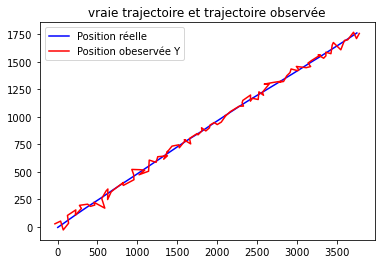

In [3]:
# Q5 
import matplotlib.pyplot as plt
plt.plot(vecteur_x[0],vecteur_x[2],label='Position réelle',color='blue')
plt.plot(vecteur_y[0],vecteur_y[1],label='Position obeservée Y',color='red')
plt.title('vraie trajectoire et trajectoire observée')
plt.legend()
plt.show()

In [4]:
#ingore : tests 
Z = np.array([[1,2],[3,4]])
u = np.array([[1,2]]).T
b = np.array([[1,1,1,1]]).T
U = np.zeros((4,4))
U[:,1] = [1,2,3,4]
A = np.array([[1,2,3,4]])
print(A)
print(A.reshape(-1))
print(A.tolist())

[[1 2 3 4]]
[1 2 3 4]
[[1, 2, 3, 4]]


In [5]:
#Q6
def filtre_de_kalman(F,Q,H,R,y_k,x_kalm_prec,P_kalm_prec):
    #retourne x_kalm_k = x_k|k, P_kalm_k

    # Partie prediction : on calcul x_k|k-1 et P_k|k-1 :
    P_k_k_moins_1 = np.matmul(F,np.matmul(P_kalm_prec,F.T)) + Q
    x_k_k_moins_1 = np.matmul(F,x_kalm_prec) 
    
    # partie update : on calcul P_k|k et x_k|k :
    # calcul du gain de Kalman K :  
    truc_inv = np.linalg.inv( np.matmul(H,np.matmul(P_k_k_moins_1,H.T)) + R ) # uniquement pour simplifier l'expression qui suit
    K = np.matmul(P_k_k_moins_1,np.matmul(H.T,truc_inv))
    # calcul de P_k|k : 
    I = np.eye(P_kalm_prec.shape[1])
    P_kalm_k = np.matmul((I - np.matmul(K,H)),P_k_k_moins_1) 
    # Calcul de x_k|k
    x_kalm_k = x_k_k_moins_1 + np.matmul(K,(y_k - np.matmul(H,x_k_k_moins_1) ))
    return [x_kalm_k,P_kalm_k]

def y_k(k):
    y_k = vecteur_y[:,k]
    #[x_kalm_k,P_kalm_k] = filtre_de_kalman(F,Q,H,R,y_k,)
    return y_k

In [6]:
# Q7
X_est=np.zeros((4,T))
x_kalm_prec = x_init
P_kalm_prec = P_kalm
X_est[:,0] = x_init.T
for k in range(1,T) :
    y_k = np.array([vecteur_y[:,k]]).T
    [x_kalm_k,P_kalm_k] = filtre_de_kalman(F,Q,H,R,y_k,x_kalm_prec,P_kalm_prec)

    X_kalm_k = x_kalm_k.reshape(-1)
    X_est[:,k] = X_kalm_k
    print("X_kalm_k : ") 
    print(X_kalm_k)
    print("y_k : ")
    print(y_k)
    x_kalm_prec = x_kalm_k
    P_kalm_prec = P_kalm_k

    

X_kalm_k : 
[42.98910802 39.99299801 16.09639219 20.06196641]
y_k : 
[[38.78791627]
 [53.27623708]]
X_kalm_k : 
[82.88973887 39.9447808  35.6284856  19.78536381]
y_k : 
[[ 72.02355547]
 [-26.70640421]]
X_kalm_k : 
[123.1544511   40.07126178  54.96743268  19.60887841]
y_k : 
[[138.4547737 ]
 [ 33.61810772]]
X_kalm_k : 
[161.68492675  39.58716413  75.77730017  19.98621566]
y_k : 
[[124.46957911]
 [104.78536657]]
X_kalm_k : 
[203.08900779  40.06067667  99.63612059  20.9954676 ]
y_k : 
[[228.89313435]
 [154.6354342 ]]
X_kalm_k : 
[241.26355741  39.63933922 119.29645743  20.69721591]
y_k : 
[[223.55964043]
 [106.76440446]]
X_kalm_k : 
[283.22447063  40.09556213 143.61889818  21.40962508]
y_k : 
[[299.0859724 ]
 [168.38722785]]
X_kalm_k : 
[315.66190597  38.74280894 169.91377669  22.27257007]
y_k : 
[[274.33770612]
 [196.27520874]]
X_kalm_k : 
[358.39013592  39.38755759 194.82440204  22.69934621]
y_k : 
[[376.56802678]
 [206.85682743]]
X_kalm_k : 
[400.54291462  39.80413622 211.46747954  21.

In [7]:
#Q8 
def erreur_quadra(k) :
    x_k = vecteur_x[:,k]
    x_hat_k = X_est[:,k]
    A = x_k - x_hat_k
    return (A).T@A

def erreur_moyenne():
    sum=0
    for k in range(1,T):
        sum+=np.sqrt(erreur_quadra(k))
    
    return (1/T)*sum

test = erreur_moyenne()
test


15.44285549449135

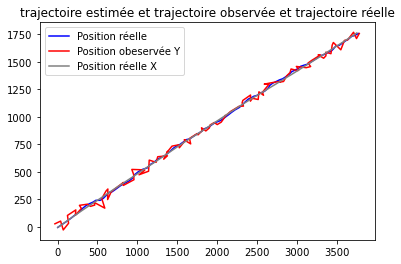

In [11]:
#juste pour plot 
plt.plot(X_est[0],X_est[2],label='Position réelle',color='blue')
plt.plot(vecteur_y[0],vecteur_y[1],label='Position obeservée Y',color='red')
plt.plot(vecteur_x[0],vecteur_x[2],label='Position réelle X',color='grey')
plt.title('trajectoire estimée et trajectoire observée et trajectoire réelle')
plt.legend()
plt.show()

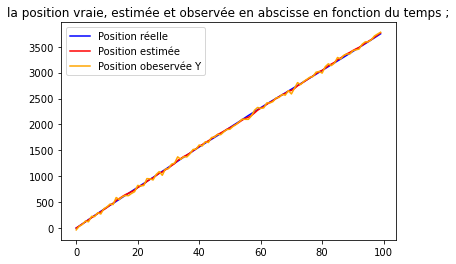

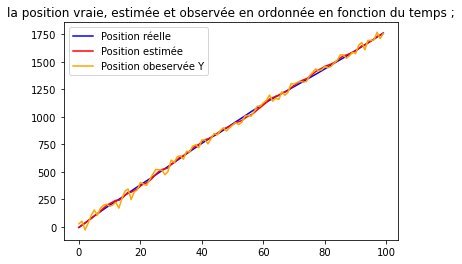

In [9]:
#Q9 
# en abssice 
plt.plot(np.arange(100),vecteur_x[0],label='Position réelle',color='blue')
plt.plot(np.arange(100),X_est[0],label='Position estimée',color='red')
plt.plot(np.arange(100),vecteur_y[0],label='Position obeservée Y',color='orange')
plt.title('la position vraie, estimée et observée en abscisse en fonction du temps ;')
plt.legend()
plt.show()  


# en ordonnéqqe
plt.plot(np.arange(100),vecteur_x[2],label='Position réelle',color='blue')
plt.plot(np.arange(100),X_est[2],label='Position estimée',color='red')
plt.plot(np.arange(100),vecteur_y[1],label='Position obeservée Y',color='orange')
plt.title('la position vraie, estimée et observée en ordonnée en fonction du temps ;')
plt.legend()
plt.show()